In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
df1= pd.read_csv(r'C:\Users\hemant\Desktop\solution\New folder\bank.csv')

In [2]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


In [4]:
df1.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [5]:
for col in df1.select_dtypes(include='object').columns:
    print(col)
    print(df1[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [6]:
# find missing value
features_na =(i for i in df1.columns if df1[i].isnull().sum()>0)
for i in features_na:
    print(i, np.round(df1[i].isnull().mean(),4),"% missing values")
else:
    print("No missing value found")
    

No missing value found


In [7]:
# find features with one variable
for col in df1.columns:
    print(col, df1[col].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
y 2


In [8]:
cat_feature =[feature for feature in df1.columns if ((df1[feature].dtype=='O') & (feature not in ['y']))]

In [9]:
for i in cat_feature:
    print('the fetaure is {} and categories are {}'.format(i, len(df1[i].unique())))

the fetaure is job and categories are 12
the fetaure is marital and categories are 3
the fetaure is education and categories are 4
the fetaure is default and categories are 2
the fetaure is housing and categories are 2
the fetaure is loan and categories are 2
the fetaure is contact and categories are 3
the fetaure is month and categories are 12
the fetaure is poutcome and categories are 4


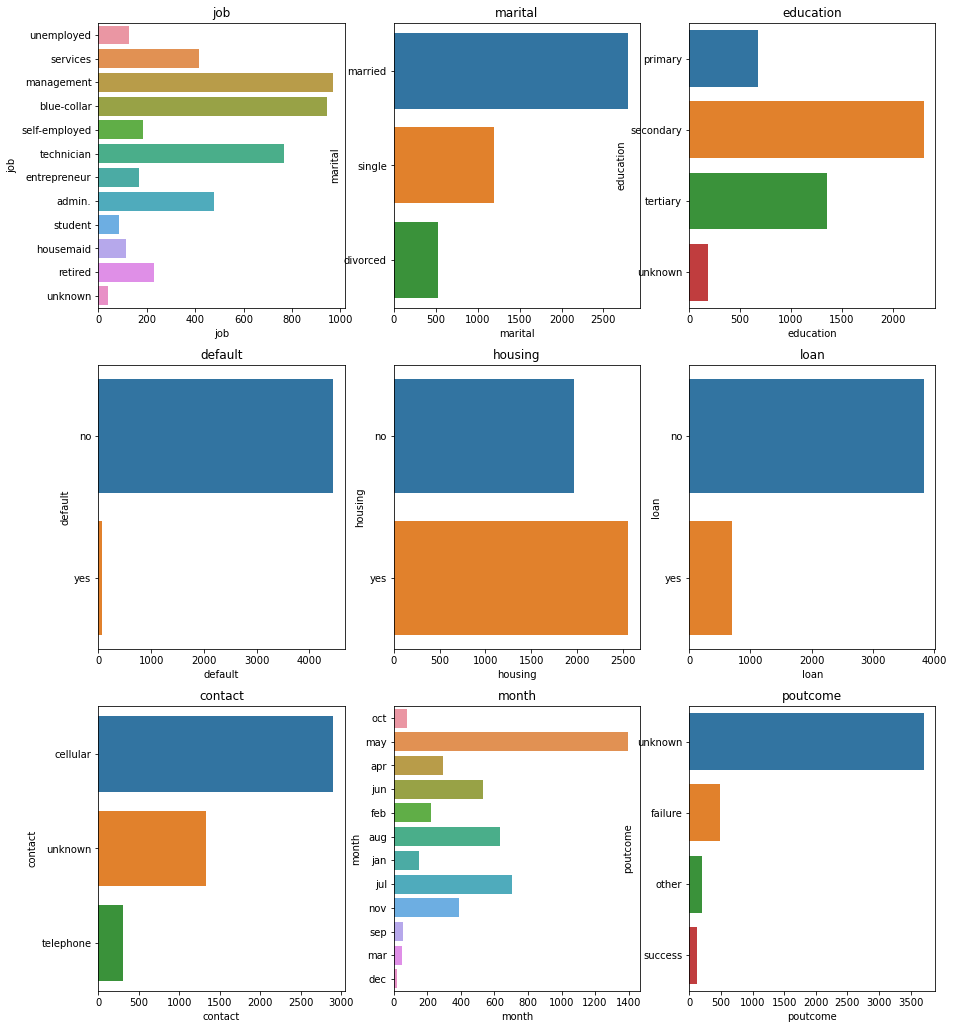

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,200))
plotnumber = 1
for i in cat_feature:
    ax = plt.subplot(32,3,plotnumber)
    sns.countplot(y=i, data =df1)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

### relation between catgorical and dependent variable

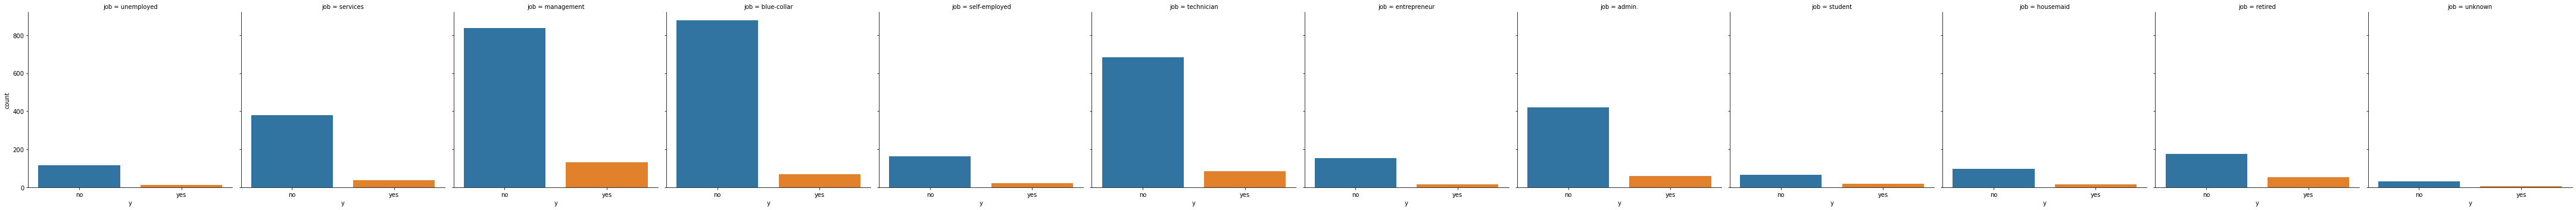

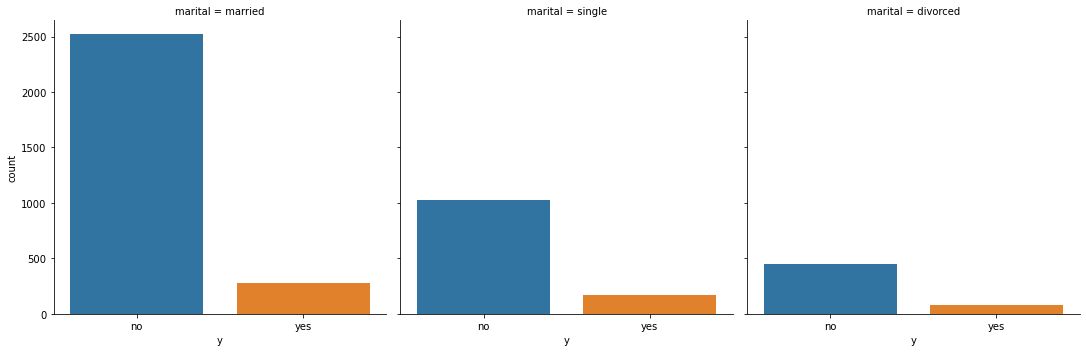

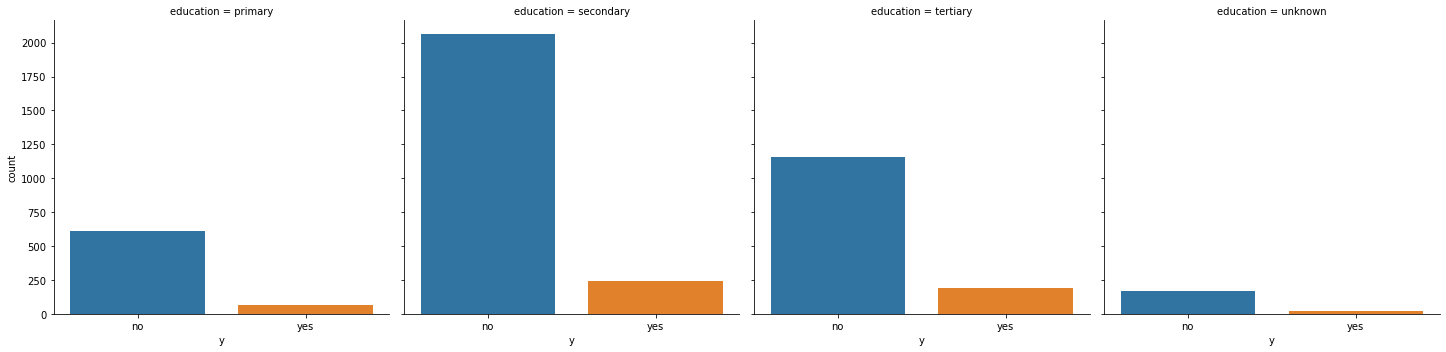

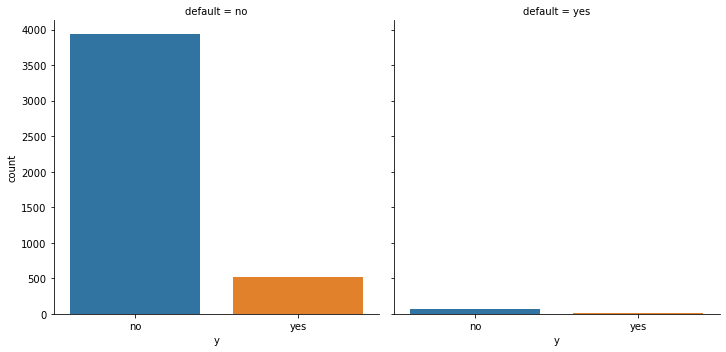

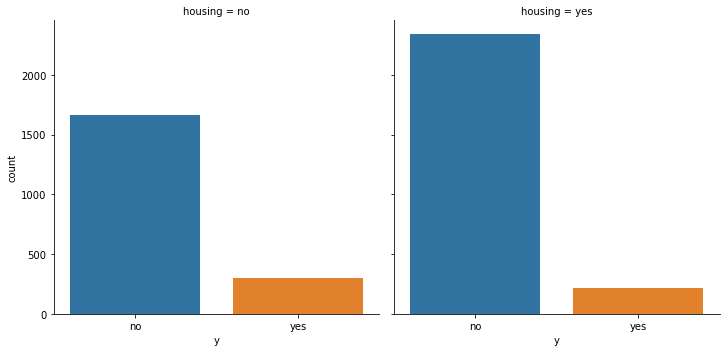

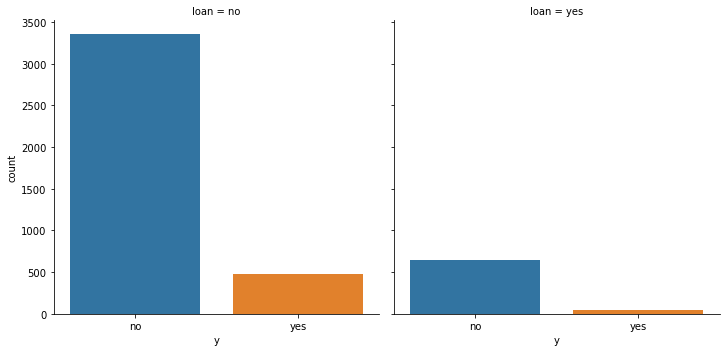

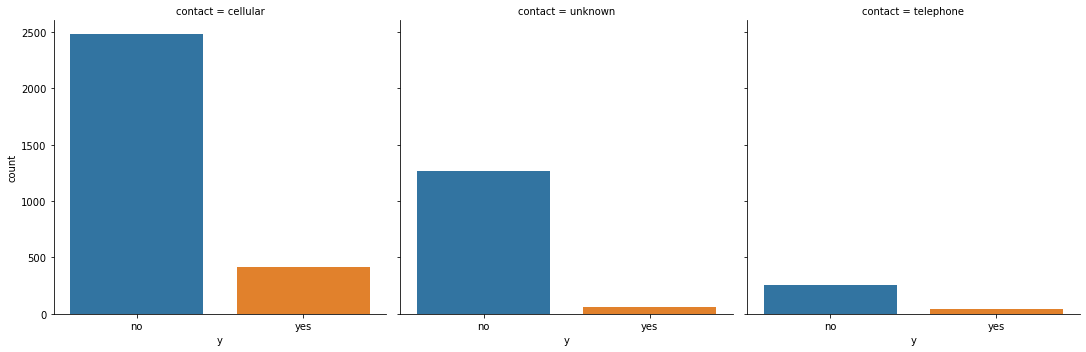

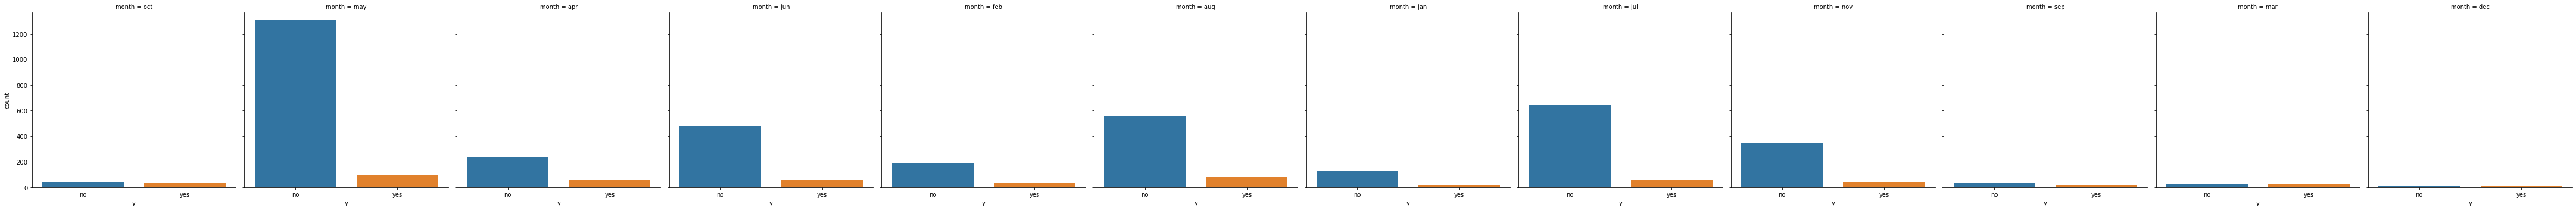

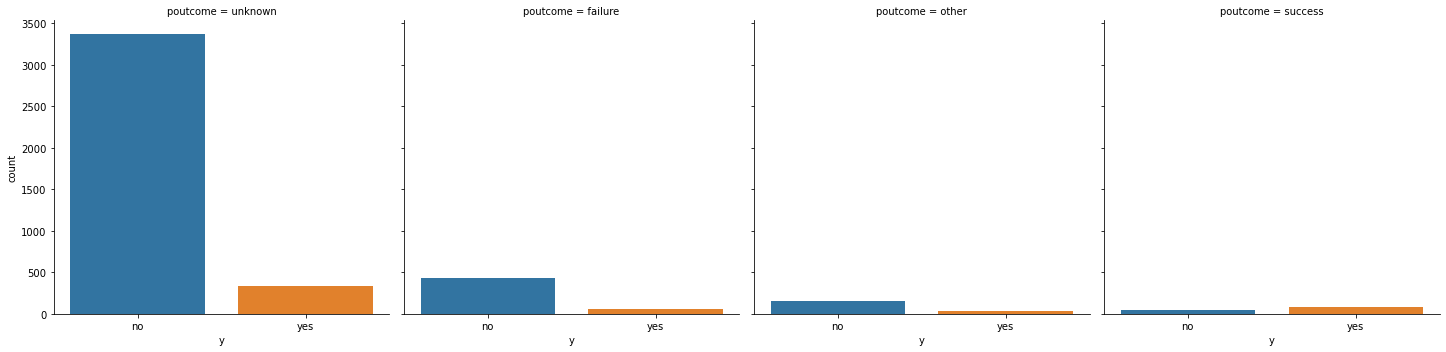

In [11]:
for cat_feature in cat_feature:
    sns.catplot(x='y', col = cat_feature, kind='count', data = df1)
plt.show()

In [12]:
numerical_feature =[feature for feature in df1.columns if ((df1[feature].dtype !='O') & (feature not in ['y']))]

In [13]:
df1[numerical_feature].head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


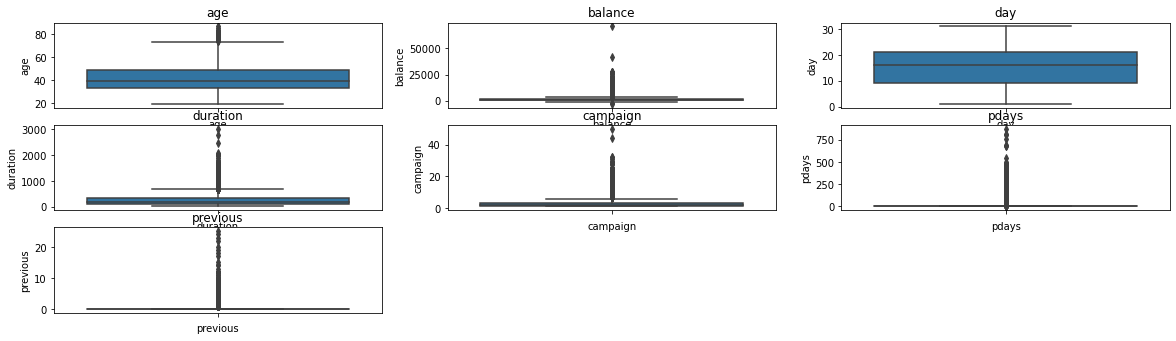

In [14]:

plt.figure(figsize=(20,60))
plotnumber = 1
for i in numerical_feature:
    ax = plt.subplot(32,3,plotnumber)
    sns.boxplot(y=i, data =df1)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

In [15]:
discrete_feature = [i for i in numerical_feature if len(df1[i].unique())<15]
print('Discrete variables count : {}'.format(len(discrete_feature)))

Discrete variables count : 0


In [16]:
continous_feature = [i for i in numerical_feature if i not in discrete_feature+['y']]
print('Continous variables count : {}'.format(len(continous_feature)))

Continous variables count : 7


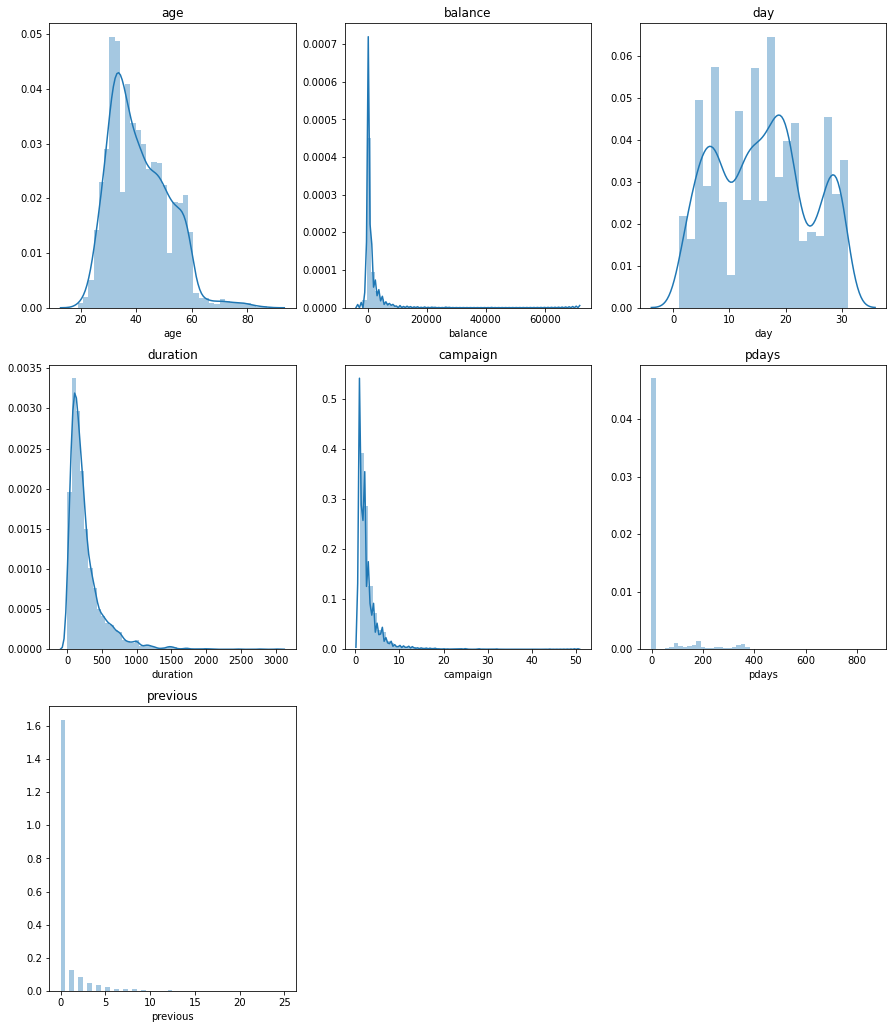

In [17]:
plt.figure(figsize=(15,200))
plotnumber = 1
for i in continous_feature:
    ax = plt.subplot(32,3,plotnumber)
    sns.distplot(df1[i])
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

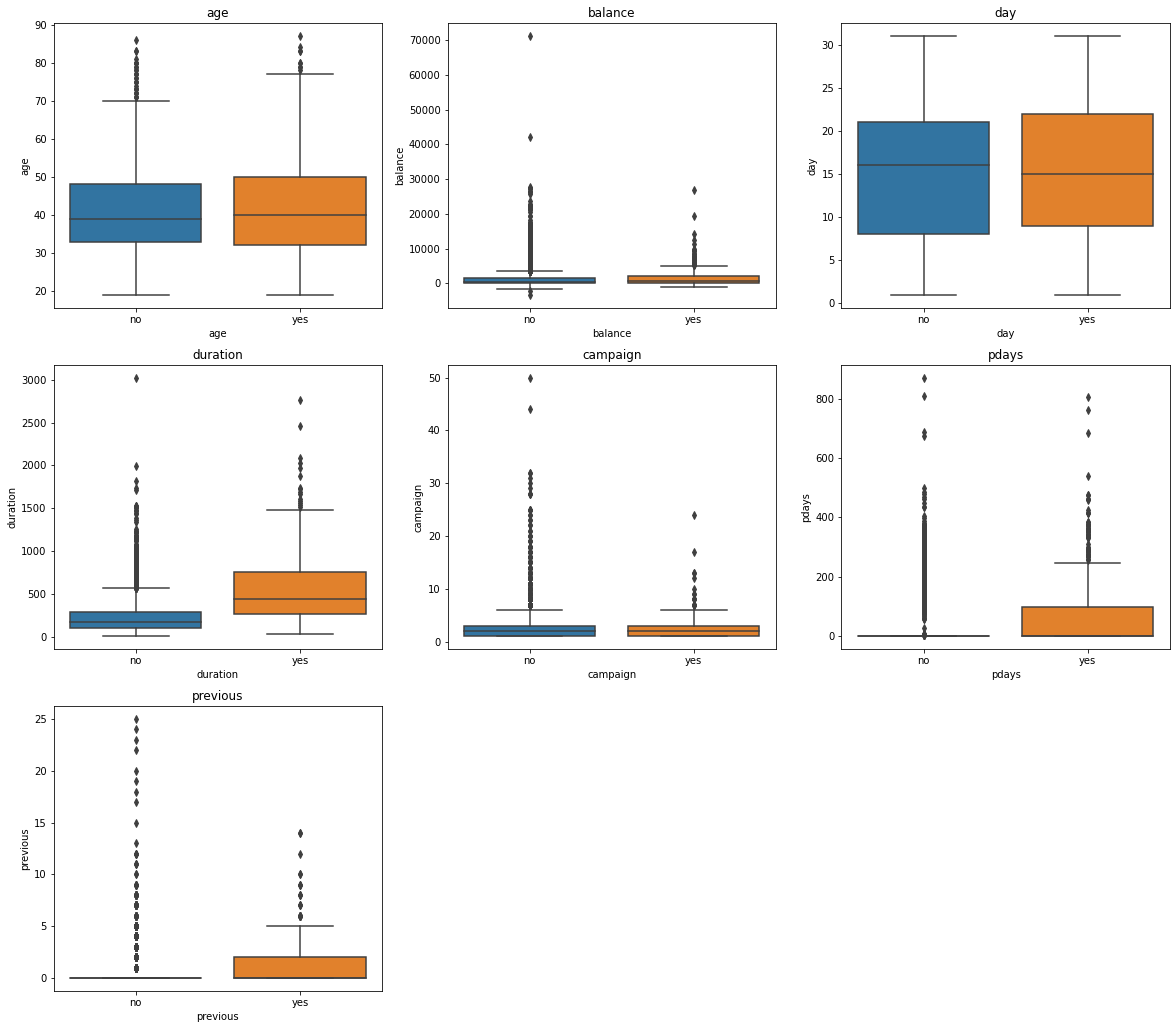

In [18]:

plt.figure(figsize=(20, 200))
plotnumber = 1
for i in continous_feature:
    ax = plt.subplot(32,3,plotnumber)
    sns.boxplot(x='y', y=df1[i], data =df1)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

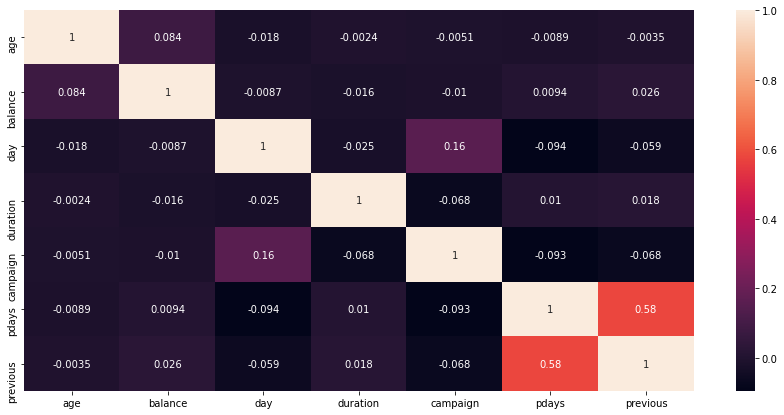

In [19]:
cor_mat = df1.corr()
fig= plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot= True)

In [20]:
df2 = df1.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
data = pd.get_dummies(df2, columns = ['job', 'marital', 'education','default','housing','loan', 'contact', 'month', 'poutcome'])
data.describe

<bound method NDFrame.describe of       age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0      30     1787   19        79         1     -1         0  no           0   
1      33     4789   11       220         1    339         4  no           0   
2      35     1350   16       185         1    330         1  no           0   
3      30     1476    3       199         4     -1         0  no           0   
4      59        0    5       226         1     -1         0  no           0   
...   ...      ...  ...       ...       ...    ...       ...  ..         ...   
4516   33     -333   30       329         5     -1         0  no           0   
4517   57    -3313    9       153         1     -1         0  no           0   
4518   57      295   19       151        11     -1         0  no           0   
4519   28     1137    6       129         4    211         3  no           0   
4520   44     1136    3       345         2    249         7  no           0   

     

In [22]:
x = data.drop('y',axis=1)
y= data['y']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(x,y, test_size=0.2)
X_train.shape, X_test.shape ,y_train.shape ,y_test.shape

((3616, 51), (905, 51), (3616,), (905,))

In [24]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
dc_pred = dc.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
confusion_matrix(dc_pred, y_test)

array([[749,  58],
       [ 53,  45]], dtype=int64)

In [28]:
accuracy_score(dc_pred, y_test)

0.8773480662983425

In [29]:
print(classification_report(y_test, dc_pred))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93       802
         yes       0.46      0.44      0.45       103

    accuracy                           0.88       905
   macro avg       0.69      0.69      0.69       905
weighted avg       0.87      0.88      0.88       905



In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
knn_pred = knn.predict(X_test)

In [32]:
accuracy_score(knn_pred, y_test)

0.8773480662983425

In [33]:
confusion_matrix(knn_pred, y_test)

array([[777,  86],
       [ 25,  17]], dtype=int64)

In [34]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93       802
         yes       0.40      0.17      0.23       103

    accuracy                           0.88       905
   macro avg       0.65      0.57      0.58       905
weighted avg       0.84      0.88      0.85       905



In [35]:
from sklearn import svm
svm_model = svm.SVC()

In [36]:
svm_model.fit(X_train, y_train)

SVC()

In [37]:
svm_pred = svm_model.predict(X_test)

In [38]:
accuracy_score(svm_pred, y_test)

0.8861878453038674

In [39]:
confusion_matrix(svm_pred, y_test)

array([[802, 103],
       [  0,   0]], dtype=int64)

In [40]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94       802
         yes       0.00      0.00      0.00       103

    accuracy                           0.89       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.79      0.89      0.83       905



In [41]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [42]:
lg_pred =lg.predict(X_test)

In [43]:
accuracy_score(svm_pred, y_test)

0.8861878453038674

In [44]:
confusion_matrix(svm_pred, y_test)

array([[802, 103],
       [  0,   0]], dtype=int64)

In [45]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94       802
         yes       0.00      0.00      0.00       103

    accuracy                           0.89       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.79      0.89      0.83       905

